### Written by Nina Nurrahmawati - nn1221
### NYU CUSP PUI
### Assignment 1 Homework 3
### This is a skeleton & instruction notebook
- #### GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
#### _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- #### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- #### Describe the behavior you see in the plots in terms of the law of large numbers.
- #### PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
#### Extra Credit: FIT a gaussian to the distribution of means            

In [19]:
from __future__ import print_function
__author__= 'Nina Nurrahmawati'

import numpy as np
import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [91]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['Chi Square', 'Gaussian', 'Poisson', 'Binomial', 'Rayleigh']

In [92]:
# give seed to be reproducible
np.random.seed(177)

In [93]:
# set mean
mymean = 100

In [94]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

In [95]:
# md is an empty dictionary
md = {}

# fil md with distributions
for dst in distributions:
    md[dst] = {}
print (md)

{'Chi Square': {}, 'Gaussian': {}, 'Poisson': {}, 'Binomial': {}, 'Rayleigh': {}}


In [96]:
# means is an empty dictionary for means
means = {}
for dstb in distributions:
    means[dstb] = {}
print (means)

{'Chi Square': {}, 'Gaussian': {}, 'Poisson': {}, 'Binomial': {}, 'Rayleigh': {}}


In [97]:
# give seed to be reproducible
np.random.seed(177)

# Generate 100 samples of different sizes N (N>10 & N<2000)
mysize = np.random.choice(range(10,1800), 100, replace=False)
print (mysize, mysize.shape)

[ 789  370  538  238 1416  892  141  454  812  242 1277  843  569 1726 1225
 1523 1169 1067  671  904  939 1356 1525   78 1332  772  440 1279  187 1453
 1649 1701  313   81 1095 1590  867  314  566  810  833  476 1406 1470  840
  218 1062 1756 1462  827 1129  217 1572  459  139  292  960  366   62  938
  770  664 1154 1516 1041 1086  785  751  372 1269   93 1797  331 1492 1620
  970 1674  943 1044 1531   50  694  545 1144 1491  706 1666 1584 1259 1438
  779  550 1707  407  963 1153 1472  122 1009  534] (100,)


### Chi Square

In [98]:
for n in mysize:
    md['Chi Square'][n] = np.random.chisquare(df, size=n)

### Gaussian / Normal Distribution

In [99]:
sigma = 5

for n in mysize:
    md['Gaussian'][n] = np.random.normal(df, sigma, n)

### Poisson Distribution

In [100]:
for n in mysize:
    md['Poisson'][n] = np.random.poisson(df, size=n)

### Binomial Distribution

In [101]:
for n in mysize:
    md['Binomial'][n] = np.random.binomial(df/0.5, 0.5, size=n)

### Rayleigh Distribution

In [102]:
sigma = 5

for n in mysize:
    md['Rayleigh'][n] = np.random.rayleigh(df/(sqrt(np.pi/2)), n)

### Plotting each distribution

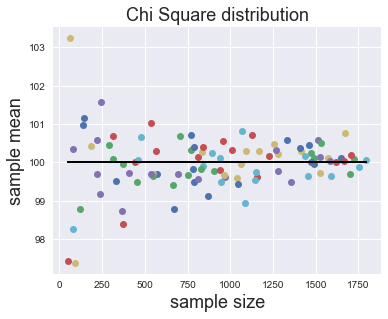

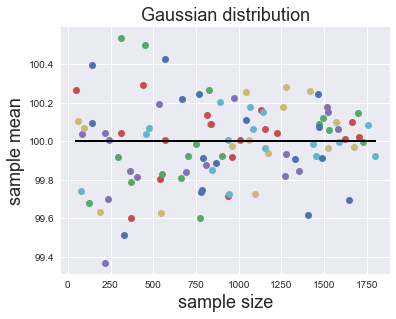

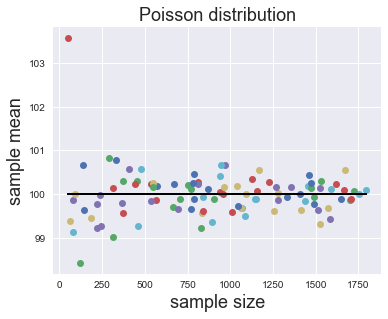

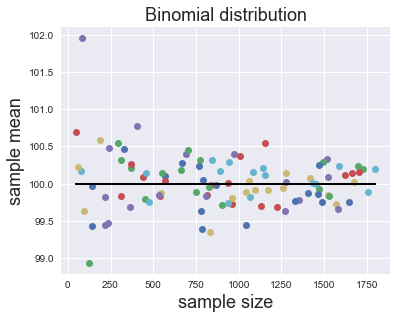

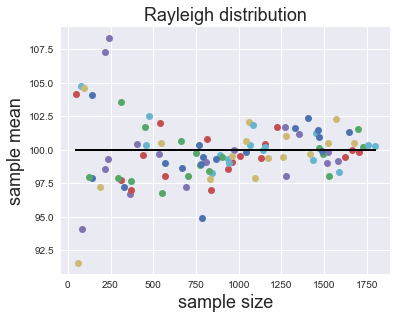

In [104]:
plot = {}
        
for i in distributions:
    plot[i] = pl.figure(figsize=(20,10)).add_subplot(231)
    for nn in md[i]:
        if not type(nn) == str:
            means[i][nn] = md[i][nn].mean()
            plot[i].plot(nn, means[i][nn], 'o')
            plot[i].set_xlabel('sample size', fontsize=18)
            plot[i].set_ylabel('sample mean', fontsize=18)
            plot[i].set_title(i + ' Distribution', fontsize=18)
            plot[i].plot([min(mysize), max(mysize)], [df, df], 'k')

#### Figure 1: Plot of sample means against sample size of each distribution

#### Describe the behavior you see in the plots in terms of the law of large numbers.

- Larger sample size tend to make sample mean closer to the population mean.

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

In [ ]:
ax = pl.figure(figsize=(10,6)).add_subplot(111)

for i in distributions:
    allmeans = list(means[i].values())
    ax.hist(allmeans, bins=30, alpha=0.7, label=i)
    ax.set_xlabel('sample mean', fontsize = 18)
    ax.set_ylabel('N', fontsize = 18)
    ax.legend()
    

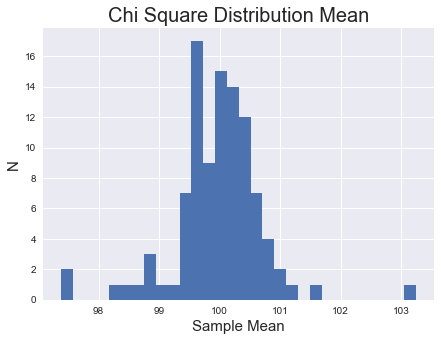

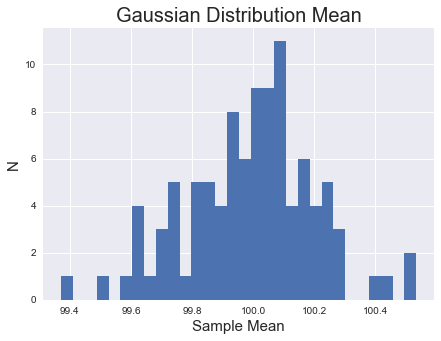

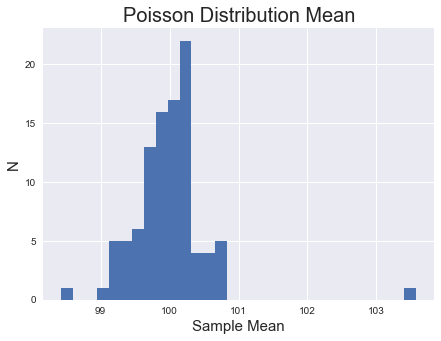

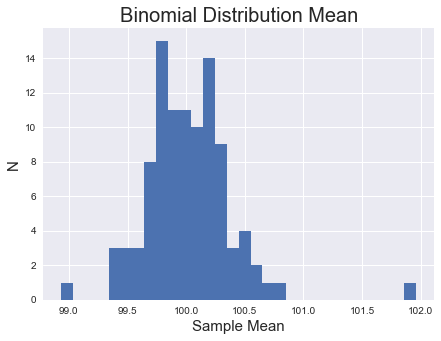

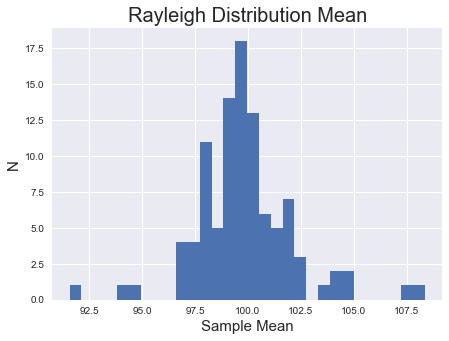

In [151]:
for i in distributions:
    eachmeans = list(means[i].values())
    pl.figure(figsize=(7, 5))
    pl.hist(eachmeans,bins=30)
    pl.xlabel('Sample Mean', fontsize = 15)
    pl.ylabel('N', fontsize = 15)
    pl.title(i + ' Distribution Mean', fontsize = 20)

#### Figure 2: Sample Mean Histogram of Each Distributions

#### PLOT the distributions of all sample means (together for all distributions)

In [183]:
allvalues = []
for i in md:
    allvalues = allvalues + list(means[i].values())
len(allvalues)

500

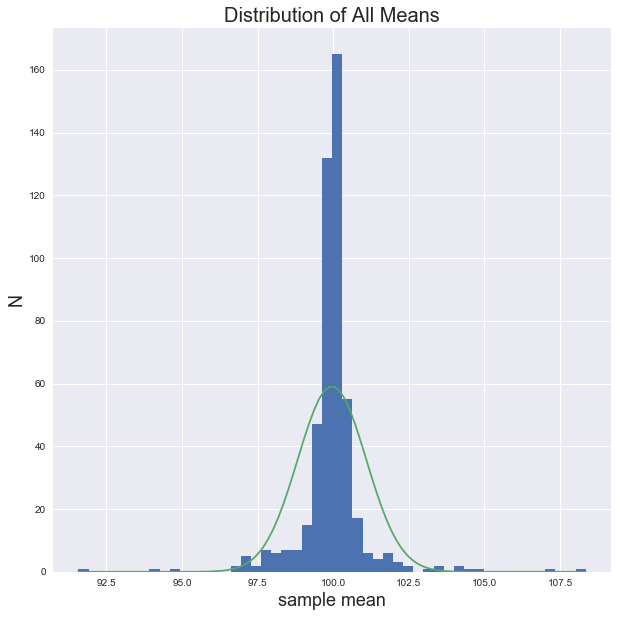

In [184]:
import matplotlib.mlab as mlab
from scipy.stats import norm

pl.figure(figsize=(10,10))
result = pl.hist(allvalues,bins=50)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Distribution of All Means', fontsize = 20)

gaus_mean = np.mean(allvalues)
gaus_variance = np.var(allvalues)
sigma = np.sqrt(gaus_variance)
x = np.linspace(min(allvalues),max(allvalues), 100)
dx = result[1][1] - result[1][0]
scale = len(allvalues)*dx
plt.plot(x, mlab.normpdf(x,gaus_mean,sigma)*scale)
plt.show()

#### Figure 3: All distributions plot